### Installing all the necessary packages and libraries

In [28]:
!pip install pandas-profiling

     |████████████████████████████████| 261 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 662 kB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 5.2 MB/s eta 0:00:011
     |████████████████████████████████| 1.9 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 5.0 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=9ea25293f4455ec5ad6d5645deec6b652c519161d406a31d6b7dadf1aaba5b91
  Stored in directory: /Users/aishwarya/Library/Caches/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename

In [5]:
!pip3 install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py) ... done
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached widgetsnbextension-3.6.0-py2.py3-none-any.whl (1.6 MB)


  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
  Using cached pyLDAvis-3.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyLDAvis-3.2.2-py2.py3-none-any.whl


  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=161293 sha256=48487f75d522ff6a75e4ea5e27435af37179a3df6e45a399bda0eccad31b2fb8
  Stored in directory: /Users/aishwarya/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 1.7.0
    Uninstalling importlib-metadata-1.7.0:
      Successfully uninstalled importlib-metadata-1.7.0
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 2.0.1
    Uninstalling widgetsnbextension-2.0.1:
      Successfully uninstalled widgetsnbextension-2.0.1
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 6.0.1
    Uninstalling ipywidget

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_rows', None)

### First we read the 'orders' csv file and perform exploratory data analysis on the data set to find key insights.

In [3]:
orders_df = pd.read_csv('orders.csv.gz')
print(orders_df.shape)
orders_df.head()

(32394, 6)


,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314


### To start with, it would be good to understand the relation between features and prep_time_seconds. Plotting a regression line to understand the same.

In [4]:
## Plot correlation between order_value_gbp and prep_time_seconds

plt.figure()
sns.regplot(x=orders_df["order_value_gbp"], y=orders_df["prep_time_seconds"])
plt.savefig('order_value_vs_and_prep_time.png')

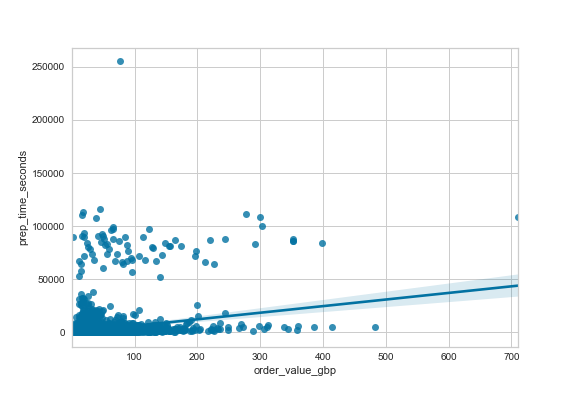

In [5]:
## Plot correlation between number_of_items and prep_time_seconds

plt.figure()
sns.regplot(x=orders_df["number_of_items"], y=orders_df["prep_time_seconds"])
plt.savefig('number_of_items_vs_and_prep_time.png')

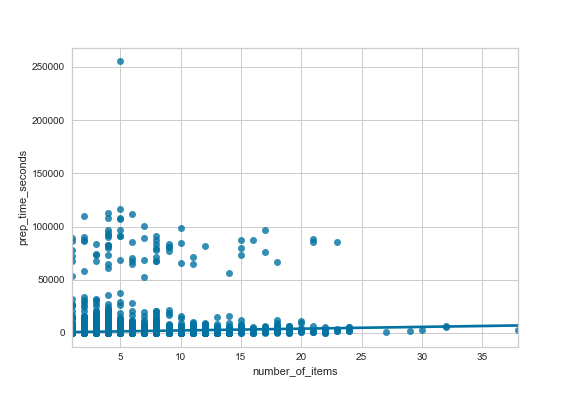

### From the above two plots, we can infer that order_value has a linear relationship with prep_time_seconds. i.e. if the order value is more, the prep time is more. number_of_items has a very slight linear relation with prep_time_seconds, if the number of items is more, prep time is more.


## Diving deep into the data to gain more insights

In [6]:
## Extract date from 'order_acknowledged_at' to get the date of order placed

order_date = [t.date() for t in pd.to_datetime(orders_df['order_acknowledged_at'])]
orders_df['order_date'] = order_date
orders_df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01


In [7]:
## Finding the date range of the data set

orders_df['order_date'].min(), orders_df['order_date'].max()

(datetime.date(2015, 6, 1), datetime.date(2015, 7, 1))

In [8]:
orders_df.groupby('order_date')['prep_time_seconds'].count().sort_values(ascending=False)

order_date
2015-06-28    1499
2015-06-20    1417
2015-06-14    1397
2015-06-07    1312
2015-06-21    1293
2015-06-12    1291
2015-06-26    1274
2015-06-13    1245
2015-06-05    1167
2015-06-19    1156
2015-06-06    1150
2015-06-25    1134
2015-06-27    1117
2015-06-24    1066
2015-06-30    1026
2015-06-17    1023
2015-06-02     994
2015-06-08     990
2015-06-23     980
2015-06-01     966
2015-06-22     956
2015-06-18     952
2015-06-10     942
2015-06-04     909
2015-06-03     905
2015-06-29     897
2015-06-16     872
2015-06-15     831
2015-06-09     817
2015-06-11     812
2015-07-01       4
Name: prep_time_seconds, dtype: int64

In [9]:
orders_df['restaurant_id'].nunique()

1697

### Reading the 'restaurants' csv file.

In [10]:
restaurants_df = pd.read_csv('restaurants.csv.gz')
print(restaurants_df.shape)
restaurants_df.head()

(1697, 4)


,restaurant_id,country,city,type_of_food
0,3,UK,London,thai
1,5,UK,London,italian
2,7,UK,London,italian
3,8,UK,London,chinese
4,9,France,Paris,korean


In [11]:
## Number of restaurants per food category

restaurants_df['type_of_food'].value_counts()

italian                 294
indian                  134
burgers                 119
american                104
thai                     85
japanese                 68
british                  67
pizza                    55
lebanese                 49
healthy                  48
chinese                  46
vietnamese               41
mexican                  38
pan asian                36
burritos                 34
mediterranean            30
french                   28
deli                     28
argentinian              26
chicken                  24
dessert                  20
fish and chips           18
european                 17
spanish                  17
bbq                      16
middle eastern           16
persian                  16
greek                    15
international            15
turkish                  14
korean                   14
juices                   13
bakery                   10
caribbean                 9
sushi                     8
brazilian           

In [12]:
## Number of orders per country

restaurants_df['country'].value_counts()

UK         1391
France      161
Germany      93
Ireland      52
Name: country, dtype: int64

In [13]:
## Number of orders per city

restaurants_df['city'].value_counts()

London         998
Paris          161
Berlin          77
Manchester      72
Dublin          52
Birmingham      49
Brighton        40
Edinburgh       37
Glasgow         33
Oxford          23
Leeds           23
Nottingham      22
Liverpool       20
Cambridge       17
München         16
Bristol         15
Reading         11
Guildford        9
Cheltenham       8
Leicester        8
Cardiff          4
Southampton      2
Name: city, dtype: int64

In [14]:
## Most frequently ordered food type for every country

restaurants_df.groupby(['country','type_of_food'])['type_of_food'].count().sort_values(ascending=False)

country  type_of_food        
UK       italian                 238
         indian                  113
         burgers                 108
         american                 79
         thai                     65
         british                  65
         japanese                 55
         pizza                    49
         chinese                  43
         lebanese                 43
         healthy                  37
         burritos                 33
         vietnamese               30
         pan asian                30
         mexican                  28
         deli                     26
France   italian                  26
UK       argentinian              25
Germany  italian                  24
UK       mediterranean            23
         chicken                  22
         dessert                  20
France   american                 20
         french                   16
UK       european                 16
France   thai                     16
UK      

## Summary of EDA done on orders.csv and restaurant.csv files

### There are 32,394 unique orders received in a one-month period from 1st June 2015 to 1st July 2015. The maximum number of 1499 orders were received on 28th June 2015, which was a Sunday and the lowest number of 4 orders were received on 1st July 2015, which was a Wednesday.

### Orders were placed in 1697 unique restaurants that serve 83 different types of food. The highest number of orders (294) were placed for Italian food, followed by 134 orders for Indian food and 119 orders for Burgers. The highest number of 998 orders were placed in London, followed by 161 orders in Paris and 77 orders in Berlin.

### Italian food seems to be the most popular food category among the UK, French and German people. Maximum number of orders placed in the UK are for Italian food, followed by Indian food. Italian and American foods are the top choices of the French people. Germans again prefer Italian food, followed by Vietnamese food. The Irish seem to be more health-conscious and go for the 'healthy' food category as much as for the Italian food. 

## Merging the 2 dataframes orders_df and restaurants_df to get more insights into the data

In [15]:
orders_and_rest = pd.merge(orders_df, restaurants_df, on='restaurant_id')
print(orders_and_rest.shape)
orders_and_rest.head()

(32394, 10)


,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date,country,city,type_of_food
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01,UK,London,burritos
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06,UK,London,burritos
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08,UK,London,burritos
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12,UK,London,burritos
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01,UK,London,chinese


In [16]:
## Checking for null values

orders_and_rest.isnull().sum()

order_acknowledged_at    0
order_ready_at           0
order_value_gbp          0
restaurant_id            0
number_of_items          0
prep_time_seconds        0
order_date               0
country                  0
city                     0
type_of_food             0
dtype: int64

##### The dataset does not contain any null values

In [17]:
## Checking for data types

orders_and_rest.dtypes

order_acknowledged_at     object
order_ready_at            object
order_value_gbp          float64
restaurant_id              int64
number_of_items            int64
prep_time_seconds          int64
order_date                object
country                   object
city                      object
type_of_food              object
dtype: object

In [18]:
## Running an auto EDA library, pandas-profiling to get an overview of the data set

prof = ProfileReport(orders_and_rest)
prof.to_file(output_file='orders_and_restaurants.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### A copy of the pandas-profiling report is enclosed. 

### The key take-aways from the analysis report are:

### There are 32394 observations, without any missing values or duplicate rows.There are 5 categorical and 4 numerical features. Parson's correlation plot shows that order_value and number_of_items have a linear correlation with food_prep_time.

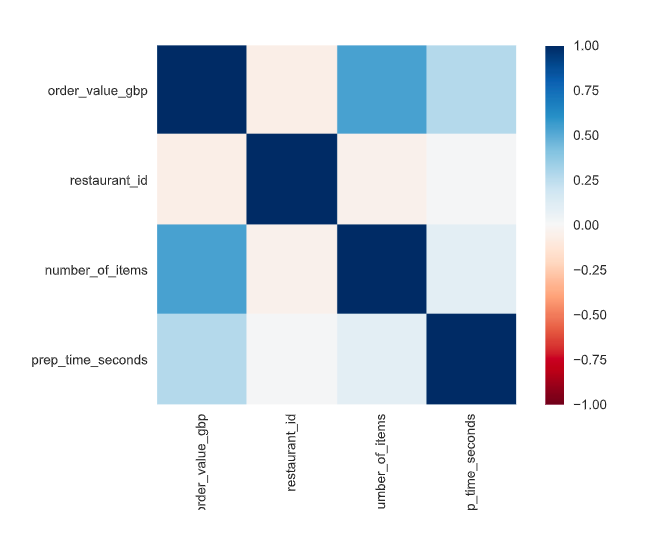pandas-profiling

## Performing further analysis to find some useful statistics

In [21]:
orders_and_rest['prep_time_mins'] = orders_and_rest['prep_time_seconds']/60
orders_and_rest.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date,country,city,type_of_food,prep_time_mins
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01,UK,London,burritos,103.666667
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06,UK,London,burritos,10.050000
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08,UK,London,burritos,7.383333
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12,UK,London,burritos,11.150000
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01,UK,London,chinese,55.233333


In [22]:
## Average food prep time based on type of food

orders_and_rest.groupby('type_of_food')['prep_time_mins'].mean().sort_values(ascending=False)

type_of_food
juices                  68.683594
creperie                55.203333
brazilian               48.934082
bakery                  45.936715
soup                    43.794444
scandinavian            41.501667
japanese peruvian       41.416667
french lebanese         40.650000
irish                   36.398148
malaysian               35.953333
healthy                 35.307253
russian                 35.297222
deli                    34.776667
argentinian             32.818489
peruvian                32.588288
sweet treats            29.328431
greek                   28.368563
indonesian              28.032738
seafood                 27.489377
pan asian               27.412302
diner                   27.172917
thaï / brunch           27.144444
georgian                26.813158
south indian            26.087798
persian                 25.689198
austrian                25.392857
lebanese moroccan       25.352564
lebanese                24.980663
middle eastern          24.824074
i

### Average preparation time taken for juices is the highest, followed by crepes and Brazilian foods.

## Performing Feature engineering to extract some new features to get deeper insight into the data

In [23]:
## Converting 'order_acknowledged_at' into datetime format

orders_and_rest['DateTime'] = pd.to_datetime(orders_and_rest['order_acknowledged_at'])
orders_and_rest.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date,country,city,type_of_food,prep_time_mins,DateTime
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01,UK,London,burritos,103.666667,2015-06-01 12:28:28.952789+01:00
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06,UK,London,burritos,10.050000,2015-06-06 17:06:24.434807+01:00
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08,UK,London,burritos,7.383333,2015-06-08 14:56:15.503204+01:00
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12,UK,London,burritos,11.150000,2015-06-12 15:12:20.497925+01:00
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01,UK,London,chinese,55.233333,2015-06-01 13:07:10.794050+01:00


### Extract hour from the 'order_acknowledged_at' time

In [24]:
hour = [t.hour for t in orders_and_rest['DateTime']]
orders_and_rest['order_hour'] = hour
orders_and_rest.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date,country,city,type_of_food,prep_time_mins,DateTime,order_hour
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01,UK,London,burritos,103.666667,2015-06-01 12:28:28.952789+01:00,12
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06,UK,London,burritos,10.050000,2015-06-06 17:06:24.434807+01:00,17
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08,UK,London,burritos,7.383333,2015-06-08 14:56:15.503204+01:00,14
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12,UK,London,burritos,11.150000,2015-06-12 15:12:20.497925+01:00,15
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01,UK,London,chinese,55.233333,2015-06-01 13:07:10.794050+01:00,13


In [25]:
## Adding time of the day when order was placed

# create a list of our conditions

conditions = [
    (orders_and_rest['order_hour'] >= 0) & (orders_and_rest['order_hour'] <= 5),
    (orders_and_rest['order_hour'] > 5) & (orders_and_rest['order_hour'] <= 11),
    (orders_and_rest['order_hour'] > 11) & (orders_and_rest['order_hour'] <= 16),
    (orders_and_rest['order_hour'] > 16) 
    ]

# create a list of the values we want to assign for each condition
values = ['early_morning', 'morning', 'afternoon', 'evening']

# create a new column and use np.select to assign values to it using our lists as arguments
orders_and_rest['time_of_day'] = np.select(conditions, values)

# display updated DataFrame
orders_and_rest.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date,country,city,type_of_food,prep_time_mins,DateTime,order_hour,time_of_day
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01,UK,London,burritos,103.666667,2015-06-01 12:28:28.952789+01:00,12,afternoon
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06,UK,London,burritos,10.050000,2015-06-06 17:06:24.434807+01:00,17,evening
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08,UK,London,burritos,7.383333,2015-06-08 14:56:15.503204+01:00,14,afternoon
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12,UK,London,burritos,11.150000,2015-06-12 15:12:20.497925+01:00,15,afternoon
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01,UK,London,chinese,55.233333,2015-06-01 13:07:10.794050+01:00,13,afternoon


### Extract day of the week

In [26]:
weekday = [t.weekday() for t in orders_and_rest['DateTime']]
orders_and_rest['weekday'] = weekday
orders_and_rest.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date,country,city,type_of_food,prep_time_mins,DateTime,order_hour,time_of_day,weekday
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01,UK,London,burritos,103.666667,2015-06-01 12:28:28.952789+01:00,12,afternoon,0
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06,UK,London,burritos,10.050000,2015-06-06 17:06:24.434807+01:00,17,evening,5
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08,UK,London,burritos,7.383333,2015-06-08 14:56:15.503204+01:00,14,afternoon,0
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12,UK,London,burritos,11.150000,2015-06-12 15:12:20.497925+01:00,15,afternoon,4
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01,UK,London,chinese,55.233333,2015-06-01 13:07:10.794050+01:00,13,afternoon,0


### The description of values in the weekday column above is as follows: 0 - Monday, 1 - Tuesday, 2-Wednesday, 3-Thursday, 4-Friday, 5-Saturday and 6 - Sunday

### Adding a column 'weekend_true' that has a value of 1 if it is weekend (Friday, Saturday, Sunday). This is to see if weekends affect the food preparation time.

In [27]:
orders_and_rest['weekend_true'] = np.where(orders_and_rest['weekday'].isin([4,5,6]),1,0)
orders_and_rest.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,order_date,country,city,type_of_food,prep_time_mins,DateTime,order_hour,time_of_day,weekday,weekend_true
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,2015-06-01,UK,London,burritos,103.666667,2015-06-01 12:28:28.952789+01:00,12,afternoon,0,0
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,2015-06-06,UK,London,burritos,10.050000,2015-06-06 17:06:24.434807+01:00,17,evening,5,1
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,2015-06-08,UK,London,burritos,7.383333,2015-06-08 14:56:15.503204+01:00,14,afternoon,0,0
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,2015-06-12,UK,London,burritos,11.150000,2015-06-12 15:12:20.497925+01:00,15,afternoon,4,1
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,2015-06-01,UK,London,chinese,55.233333,2015-06-01 13:07:10.794050+01:00,13,afternoon,0,0


### Plot weekday vs number of orders 

In [28]:
plt.figure()
x = orders_and_rest.groupby('weekday')['prep_time_mins'].count().sort_values(ascending=False)
x1 = [0,1,2,3,4,5,6]
y1 = [x[0],x[1],x[2],x[3],x[4],x[5],x[6]]
plt.bar(x1,y1)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week')
plt.ylabel('Number of orders')
plt.savefig('weekday_vs_num_of_orders.png')

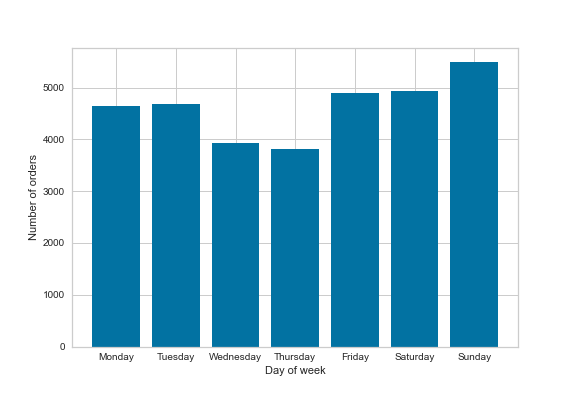

### From above it can be seen that maximum number of orders are received on Sundays, followed by Saturdays and Fridays (weekends). And the lowest number of orders are received on Thursdays, followed by Wednesdays.

### Plot Weekday vs Avg Food prep time

In [ ]:
plt.figure(figsize=(10,8))
orders_and_rest.groupby('weekday')['prep_time_mins'].mean().plot.bar()
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week')
plt.ylabel('Average Food prep time (mins)')
plt.savefig('weekday_vs_avg_food_prep_time.png')

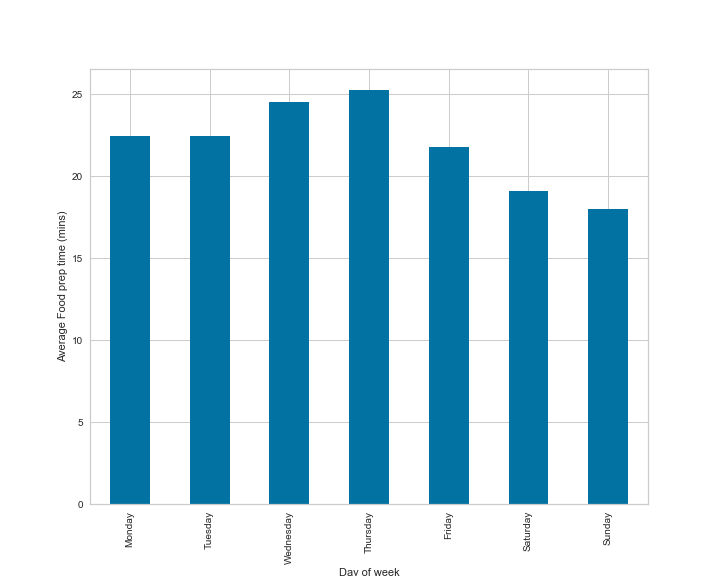

### Average food preparation time is the highest on Thursdays, followed by Wednesdays. 
### This is in correlation with the number of orders received on these days. A plausible explanation for this could be that since the number of orders received on Thursdays and Wednesdays are the lowest, the restaurants do not have any pre-cooked meal so when a new order is received, the food is cooked from the scratch and hence the time taken is longer, compared to the days when the number of orders are higher.

### Plot time of the day vs number of orders

In [ ]:
plt.figure(figsize=(12,10))
orders_and_rest.groupby('time_of_day')['prep_time_mins'].count().plot.bar()
plt.xlabel('Time of day')
plt.ylabel('Number of orders')
plt.savefig('time_of_day_vs_num_of_orders.png')

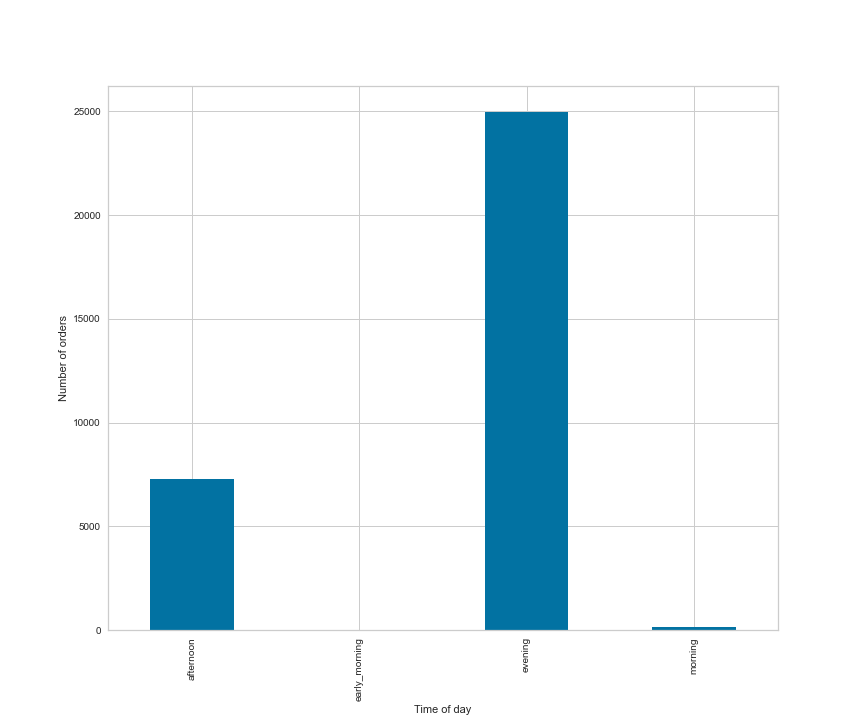

### From above, it can be observed that the maximum number of orders in any day are received in the evening hours, after 4 pm. The next highest number of orders are received in the afternoon between 12 pm and 5 pm.

In [ ]:
plt.figure(figsize=(12,10))
orders_and_rest.groupby('time_of_day')['prep_time_mins'].mean().plot.bar()
plt.xlabel('Time of day')
plt.ylabel('Average Food prep time (mins)')
plt.savefig('time_of_day_vs_avg_food_prep_time.png')

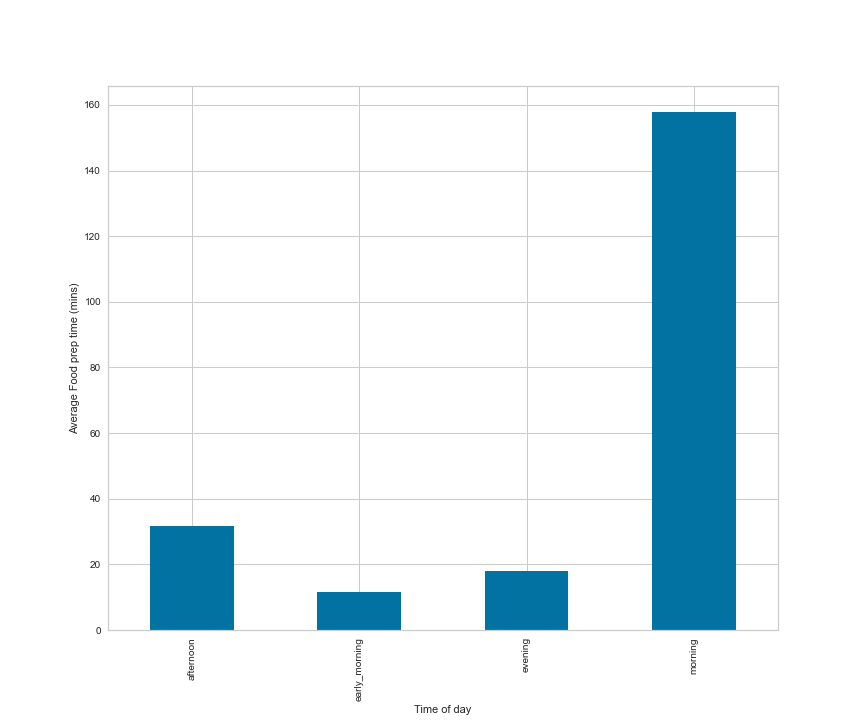

### The average time taken to prepare the food is the highest in the morning hours. This could be attributed to the fact that restaurants open up in the morning between 6 am and 7 am and then start preparing the food from scratch. Thus it takes longer time to prepare food in the morning hours.

## Taking the features that are useful for modelling to predict the food preparation time.

In [29]:
orders_and_rest.columns

Index(['order_acknowledged_at', 'order_ready_at', 'order_value_gbp',
       'restaurant_id', 'number_of_items', 'prep_time_seconds', 'order_date',
       'country', 'city', 'type_of_food', 'prep_time_mins', 'DateTime',
       'order_hour', 'time_of_day', 'weekday', 'weekend_true'],
      dtype='object')

In [30]:
df_reqd = orders_and_rest[['order_value_gbp',
       'restaurant_id', 'number_of_items', 'prep_time_seconds', 'country',
       'city', 'type_of_food', 'time_of_day', 'weekday', 'weekend_true']]
df_reqd.head()

,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,time_of_day,weekday,weekend_true
0,59.90,1326,2,6220,UK,London,burritos,afternoon,0,0
1,24.00,1326,8,603,UK,London,burritos,evening,5,1
2,15.25,1326,3,443,UK,London,burritos,afternoon,0,0
3,28.05,1326,8,669,UK,London,burritos,afternoon,4,1
4,56.30,255,7,3314,UK,London,chinese,afternoon,0,0


## Preparing data for modelling

In [31]:
df_reqd_le = df_reqd.copy()
df_reqd_le.head()

,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,time_of_day,weekday,weekend_true
0,59.90,1326,2,6220,UK,London,burritos,afternoon,0,0
1,24.00,1326,8,603,UK,London,burritos,evening,5,1
2,15.25,1326,3,443,UK,London,burritos,afternoon,0,0
3,28.05,1326,8,669,UK,London,burritos,afternoon,4,1
4,56.30,255,7,3314,UK,London,chinese,afternoon,0,0


### Converting categorical data into numerical using Label Encoding

In [32]:
le = LabelEncoder()
df_reqd_le[['city', 'type_of_food', 'country', 'time_of_day']] = df_reqd_le[['city', 'type_of_food', 'country', 'time_of_day']].apply(le.fit_transform)
df_reqd_le.head()


,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,time_of_day,weekday,weekend_true
0,59.90,1326,2,6220,3,14,13,0,0,0
1,24.00,1326,8,603,3,14,13,2,5,1
2,15.25,1326,3,443,3,14,13,0,0,0
3,28.05,1326,8,669,3,14,13,0,4,1
4,56.30,255,7,3314,3,14,16,0,0,0


In [33]:
cols_list = list(df_reqd_le.columns)
cols_list.remove('prep_time_seconds')
cols_list

['order_value_gbp',
 'restaurant_id',
 'number_of_items',
 'country',
 'city',
 'type_of_food',
 'time_of_day',
 'weekday',
 'weekend_true']

In [34]:
# calculate the correlation matrix
corr = df_reqd_le.corr()

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.savefig('orders_and_rest_correlation')
corr

,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food,time_of_day,weekday,weekend_true
order_value_gbp,1.000000,-0.056161,0.537032,0.272160,0.073422,0.023742,0.054201,0.009405,-0.011047,-0.002276
restaurant_id,-0.056161,1.000000,-0.043202,0.009657,-0.284492,-0.108840,0.001025,-0.002365,0.018580,0.022362
number_of_items,0.537032,-0.043202,1.000000,0.091153,0.066276,0.007145,-0.104628,-0.003746,0.019546,0.024481
prep_time_seconds,0.272160,0.009657,0.091153,1.000000,0.026446,-0.017638,0.008416,-0.062690,-0.023377,-0.027163
country,0.073422,-0.284492,0.066276,0.026446,1.000000,-0.283663,-0.001032,0.014646,0.016813,0.022263
city,0.023742,-0.108840,0.007145,-0.017638,-0.283663,1.000000,0.007378,-0.017045,-0.022921,-0.031119
type_of_food,0.054201,0.001025,-0.104628,0.008416,-0.001032,0.007378,1.000000,0.068004,-0.028104,-0.031496
time_of_day,0.009405,-0.002365,-0.003746,-0.062690,0.014646,-0.017045,0.068004,1.000000,-0.044233,-0.041312
weekday,-0.011047,0.018580,0.019546,-0.023377,0.016813,-0.022921,-0.028104,-0.044233,1.000000,0.879078
weekend_true,-0.002276,0.022362,0.024481,-0.027163,0.022263,-0.031119,-0.031496,-0.041312,0.879078,1.000000


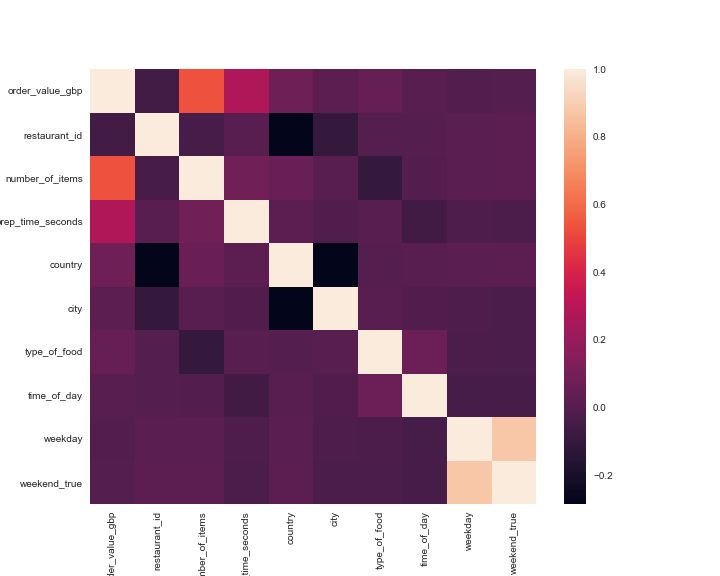

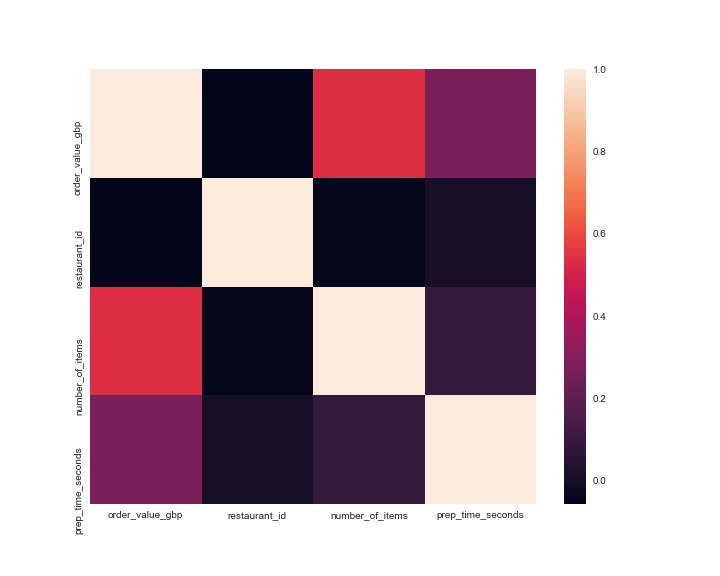

### Dropping restaurant_id and type_of_food as they have a very low coefficient of correlation with food_prep_time

In [35]:
train_data = df_reqd_le.drop(['restaurant_id', 'type_of_food'],axis=1)
train_data.shape, df_reqd_le.shape

((32394, 8), (32394, 10))

In [36]:
train_data.head()

,order_value_gbp,number_of_items,prep_time_seconds,country,city,time_of_day,weekday,weekend_true
0,59.90,2,6220,3,14,0,0,0
1,24.00,8,603,3,14,2,5,1
2,15.25,3,443,3,14,0,0,0
3,28.05,8,669,3,14,0,4,1
4,56.30,7,3314,3,14,0,0,0


In [37]:
train_data.columns

Index(['order_value_gbp', 'number_of_items', 'prep_time_seconds', 'country',
       'city', 'time_of_day', 'weekday', 'weekend_true'],
      dtype='object')

In [38]:
X = train_data[['order_value_gbp', 'number_of_items',
        'country', 'city', 'time_of_day', 'weekday', 'weekend_true']]

Y = train_data['prep_time_seconds']

## Split into train and test data

In [39]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)


In [40]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.3, random_state=123)

In [41]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape, X_test.shape, Y_test.shape

((15872, 7), (6803, 7), (15872,), (6803,), (9719, 7), (9719,))

### Pycaret to select best model

### Using an AutoML library called PyCaret to find the best model that would give the best results for the given dataset.

In [533]:
from pycaret.regression import *
regression_le = setup(data=train_data,target='prep_time_seconds')


,Description,Value
0,session_id,1356
1,Target,prep_time_seconds
2,Original Data,"(32394, 8)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(22675, 19)"


In [534]:
best_model_le = compare_models(fold=5, sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,1124.5276,18470339.4345,4255.0376,0.0966,1.2840,2.9564,0.1320
ridge,Ridge Regression,1125.6299,18470929.9056,4255.0902,0.0966,1.2856,2.9590,0.0880
lr,Linear Regression,1125.6641,18471251.3878,4255.1208,0.0965,1.2852,2.9583,3.2540
lar,Least Angle Regression,1125.8807,18471433.7059,4255.1420,0.0965,1.2851,2.9602,0.0600
br,Bayesian Ridge,1126.1380,18474487.9323,4255.5709,0.0963,1.2855,2.9650,0.0880
llar,Lasso Least Angle Regression,1038.1571,18610962.3800,4270.5842,0.0911,1.1897,2.9606,0.0620
en,Elastic Net,1102.5432,18645202.0500,4275.5543,0.0877,1.2274,2.7706,0.0560
omp,Orthogonal Matching Pursuit,1080.6947,18868610.9190,4302.0261,0.0764,1.1957,2.8111,0.0500
gbr,Gradient Boosting Regressor,936.1407,19060594.8261,4335.4868,0.0486,1.1319,3.0645,0.9160
par,Passive Aggressive Regressor,920.1448,19565947.6072,4375.3404,0.0484,1.1386,3.1035,0.0780


In [ ]:
X_train_val.head()

In [71]:
# starting with linear regression model
model_lr = LinearRegression()


model_lr.fit(X_train,Y_train)
y_pred = model_lr.predict(X_val)

r2_lr = r2_score(Y_val, y_pred)
r2_lr

0.02951688171821154

## Base models for Ridge and Lasso regression

In [72]:
reg_ridge = linear_model.Ridge()
reg_lasso = linear_model.Lasso()


reg_ridge.fit(X_train,Y_train)
reg_lasso.fit(X_train,Y_train)

ridge_pred = reg_ridge.predict(X_val)
lasso_pred = reg_lasso.predict(X_val)


r2_ridge = r2_score(Y_val, ridge_pred)
r2_lasso = r2_score(Y_val, lasso_pred)

print('r2_ridge_base', r2_ridge, '\n', 'r2_lasso_base', r2_lasso)

r2_ridge_base 0.029516571609763398 
 r2_lasso_base 0.02949287370758047


## Grid search for Ridge regression

In [73]:
## Grid search for Ridge regression
ridge_params = {'alpha':np.linspace(start = 100, stop = 1000, num = 10)}

# ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
GridSearchCV(linear_model.Ridge(), param_grid=ridge_params).fit(X_train,Y_train).best_estimator_

Ridge(alpha=1000.0)

In [74]:
reg_ridge_gs = linear_model.Ridge(alpha=1000)
reg_ridge_gs.fit(X_train,Y_train)

ridge_pred_gs = reg_ridge_gs.predict(X_val)

ridge_gs_mae = mean_absolute_error(Y_val, ridge_pred_gs)
ridge_gs_r2 = r2_score(Y_val, ridge_pred_gs)

print('mae_ridge_gs', ridge_gs_mae, '\n','r2_ridge_gs', ridge_gs_r2)

mae_ridge_gs 1037.8299315729982 
 r2_ridge_gs 0.029222507810629406


In [75]:
## Change in the R2 value after grid search CV in Ridge regression

ridge_r2_improvement = ((ridge_gs_r2 - r2_ridge)/abs(r2_ridge))*100
print('Change in R2 value after grid search in Ridge regression:', ridge_r2_improvement, '%')

Change in R2 value after grid search in Ridge regression: -0.9962667853902205 %


In [76]:
## Change in the R2 value after grid search CV in Ridge regression On test data

base_ridge_test_pred = reg_ridge.predict(X_test)
ridge_pred_gs_test_pred = reg_ridge_gs.predict(X_test)

ridge_gs_r2_test = r2_score(Y_test, ridge_pred_gs_test_pred)
base_ridge_r2_test = r2_score(Y_test, base_ridge_test_pred)
base_ridge_r2_test, ridge_gs_r2_test

ridge_r2_improvement_test = ((ridge_gs_r2_test - base_ridge_r2_test)/abs(base_ridge_r2_test))*100
print('Change in R2 value after grid search in Ridge regression on test data:', ridge_r2_improvement_test, '%')

Change in R2 value after grid search in Ridge regression on test data: -0.3039641765993416 %


## Grid search for Lasso regression

In [77]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(X_train,Y_train).best_estimator_

Lasso(alpha=0.03)

In [78]:
reg_lasso_gs = linear_model.Lasso(alpha=0.02)
reg_lasso_gs.fit(X_train,Y_train)
lasso_pred_gs = reg_lasso_gs.predict(X_val)
lasso_gs_mae = mean_absolute_error(Y_val, lasso_pred_gs)
lasso_gs_r2 = r2_score(Y_val, lasso_pred_gs)

print('mae_lasso_gs', lasso_gs_mae, '\n', 'r2_lasso_gs', lasso_gs_r2)

mae_lasso_gs 1043.1318640018696 
 r2_lasso_gs 0.029516438324399652


#### Improvement in the R2 value after grid search CV in Lasso regression

In [79]:
## Improvement in the R2 value after grid search CV in Lasso regression

lasso_r2_improvement = ((lasso_gs_r2 - r2_lasso)/abs(r2_lasso))*100
print('Improvement in R2 value after grid search in Lasso regression:', lasso_r2_improvement, '%')

Improvement in R2 value after grid search in Lasso regression: 0.079899358240991 %


In [80]:
## Change in the R2 value after grid search CV in Lasso regression On test data

base_lasso_test_pred = reg_lasso.predict(X_test)
lasso_pred_gs_test_pred = reg_lasso_gs.predict(X_test)

lasso_gs_r2_test = r2_score(Y_test, lasso_pred_gs_test_pred)
base_lasso_r2_test = r2_score(Y_test, base_lasso_test_pred)
base_ridge_r2_test, ridge_gs_r2_test

lasso_r2_improvement_test = ((lasso_gs_r2_test - base_lasso_r2_test)/abs(base_lasso_r2_test))*100
print('Change in R2 value after grid search in Lasso regression on test data:', lasso_r2_improvement_test, '%')

Change in R2 value after grid search in Lasso regression on test data: 0.03827288406698833 %


## Model performance evaluation

### A negative value of R2 is not good for model's performance. However, on fine tuning the model, some improvement was seen in Lasso regression. The performance of the model can be further improved by further fine tuning the model. However, in the interest of time, this could not be done. 


### In the presence of more time, I could have tested a few more regression models to understand which model performs the best. One of the other models that I would have tested is RandomForest Regressor.

### RFRegressor

In [81]:
base_model_rf = RandomForestRegressor()
base_model_rf

RandomForestRegressor()

In [82]:
base_model_rf.fit(X_train,Y_train)

base_model_rf_pred = base_model_rf.predict(X_val)
base_rf_mae = mean_absolute_error(Y_val, base_model_rf_pred)
base_rf_r2 = r2_score(Y_val, base_model_rf_pred)

In [83]:
print('Base RF model mae and r2 are:', base_rf_mae, base_rf_r2)

Base RF model mae and r2 are: 1082.8405803598105 -0.20394566829862315


In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [85]:
## Base model
rf_regressor = RandomForestRegressor()

cv = RepeatedKFold(n_splits=3, n_repeats=2,random_state=1)
randomsearch_rf = RandomizedSearchCV(rf_regressor, param_distributions= random_grid, n_iter=5, \
                                      scoring='neg_root_mean_squared_error',n_jobs=-1,cv=cv,verbose=3)

randomsearch_rf.fit(X_train,Y_train)

Fitting 6 folds for each of 5 candidates, totalling 30 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=1),
                   estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [86]:
best_rf_reg_model = randomsearch_rf.best_estimator_
best_rf_reg_model

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=600)

In [87]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,Y_train)
base_model_rf_pred = base_model.predict(X_val)
base_model_rf_pred_test = base_model.predict(X_test)





best_random = randomsearch_rf.best_estimator_
best_random.fit(X_train,Y_train)
best_random_rf_pred = best_random.predict(X_val)
best_random_rf_pred_test = best_random.predict(X_test)

In [89]:
base_rf_mae = mean_absolute_error(Y_val, base_model_rf_pred)
base_rf_r2 = r2_score(Y_val, base_model_rf_pred)

base_rf_mae_test = mean_absolute_error(Y_test, base_model_rf_pred_test)
base_rf_r2_test = r2_score(Y_test, base_model_rf_pred_test)



best_random_rf_mae = mean_absolute_error(Y_val, best_random_rf_pred)
best_random_rf_r2 = r2_score(Y_val, best_random_rf_pred)

best_random_rf_mae_test = mean_absolute_error(Y_test, best_random_rf_pred_test)
best_random_rf_r2_test = r2_score(Y_test, best_random_rf_pred_test)





In [93]:
base_rf_mae, base_rf_r2, base_rf_mae_test, base_rf_r2_test

(1137.8536657228644,
 -0.4580248316414317,
 1133.779367420639,
 -0.03243150777273618)

In [94]:
best_random_rf_mae, best_random_rf_r2, best_random_rf_mae_test, best_random_rf_r2_test

(929.1425232111624,
 0.028184512280077012,
 952.5528140236629,
 0.16548818109199492)

In [95]:
print('Improvement in val r2 of {:0.2f}%.'.format( 100 * (best_random_rf_r2 - base_rf_r2) / abs(base_rf_r2)))

print('Improvement in test r2 of {:0.2f}%.'.format( 100 * (best_random_rf_r2_test - base_rf_r2_test) / abs(base_rf_r2_test)))

Improvement in val of 106.15%.
Improvement in test of 610.27%.


In [96]:
print('Improvement in val mae of {:0.2f}%.'.format( 100 * abs(best_random_rf_mae - base_rf_mae) / abs(base_rf_mae)))

print('Improvement in test mae of {:0.2f}%.'.format( 100 * abs(best_random_rf_mae_test - base_rf_mae_test) / abs(base_rf_mae_test)))



Improvement in val mae of 18.34%.
Improvement in test mae of 15.98%.
